In [23]:
# %load ../processing_tools.py
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import scienceplots

plt.style.use(['science', 'russian-font'])

matplotlib.rcParams.update({
    'figure.figsize': [6, 4],
    'savefig.facecolor': 'white',
    'figure.dpi': 150.0,
    'font.size': 12.0,
})


In [24]:
I_names = np.array([13, 24, 35, 46, 57, 68, 79, 90, 101])
I_values = I_names * 1.5 / 155# ток в мА

In [25]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

### График зависимости индукции от силы тока в обмотках магнита $B = f(I_\text{М})$

In [26]:
df = pd.read_csv(rf'data/induction_on_amperage.csv')

B = np.array(df['Ind[mT]'])
I_m = np.array(df['I[mA]'])

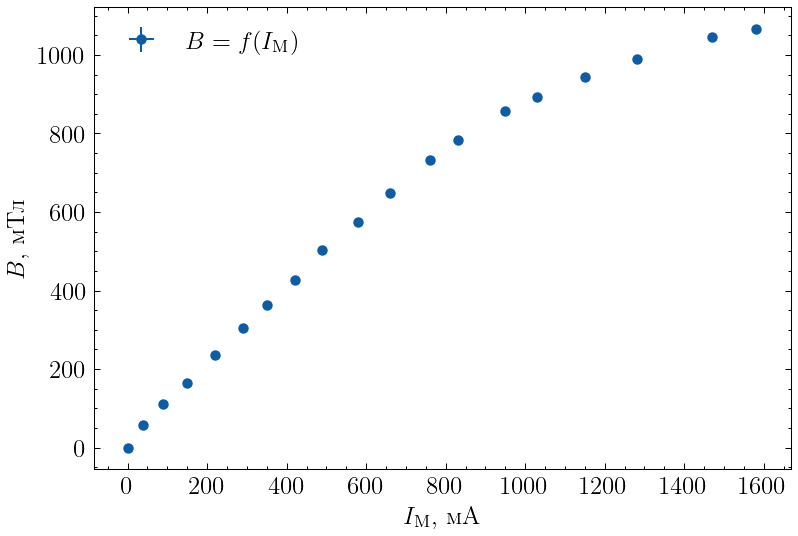

In [27]:
plt.errorbar(I_m, B, xerr=5+0.003*I_m, yerr=0.5+0.003*B, lw=1, ls='', marker='.', markersize=8, label=r"$B = f(I_\text{М})$", ds='default')
    
plt.xlabel(r"$I_\text{М}$, мА")
plt.ylabel(r"$B$, мТл")

plt.legend()
plt.savefig(rf"images/BonI.png")
plt.show()

### Семейство характеристик $\varepsilon_\text{х} = f(B)$

In [28]:
def B_approx(x):
    for i, xi in enumerate(I_m):
        if xi >= x:
            x1 = I_m[i - 1]
            x2 = I_m[i]
            y1 = B[i - 1]
            y2 = B[i]
            return y1 + (y2-y1)/(x2-x1)*(x-x1)

In [29]:
def line(x, arg1, arg2):
    return x * arg1 + arg2

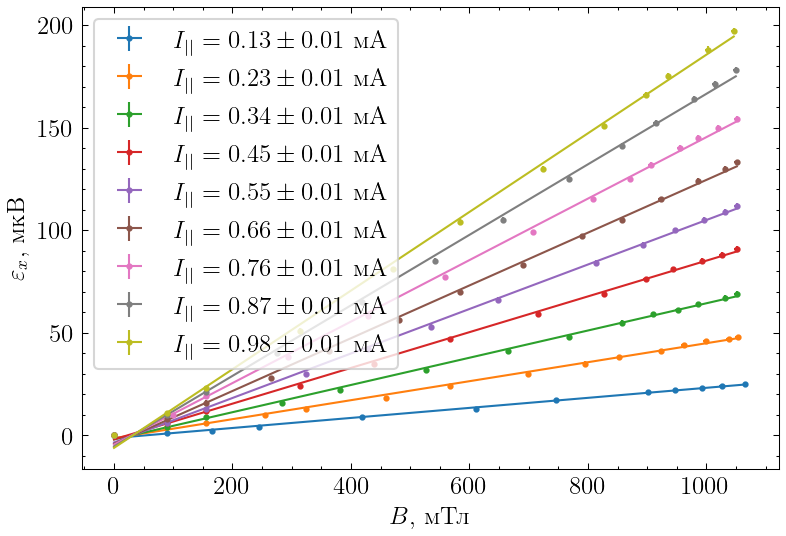

In [30]:
dE_dB = []

for i, I_name in enumerate(I_names):
    df = pd.read_csv(rf"data/VoA_{I_name}.csv")
    
    U_ = df["U_34[mV]"]
    U0 = U_[0]
    U = 1000*(U0 - U_)
    
    I_ = df["I_m[mA]"]
    B_ = np.array([B_approx(x) for x in I_], dtype=np.float64)
    
    popt, pcov = curve_fit(line, B_, U)
    
    # print(f"k = {popt[0]:.4f} \t ")
    dE_dB.append(popt[0]/1000)
    
    plt.errorbar(B_, U, xerr=1+0.003*B_, yerr=1+0.003*U, ls='', marker='.', markersize=4, label=r"$I_{||} = "+rf"{I_values[i]:.2f}\pm{1.5/155:.2f}$ мА", ds='default', color=colors[i])
    plt.plot(B_, line(B_, popt[0], popt[1]), color=colors[i], lw=1)

dE_dB = np.array(dE_dB) * 1000
    
plt.xlabel(r"$B$, мТл")
plt.ylabel(r"$\varepsilon_x$, мкВ")

plt.legend(frameon=True)
plt.savefig(rf"images/UonB.png")
plt.show()

### Зависимость $k = f(I)$

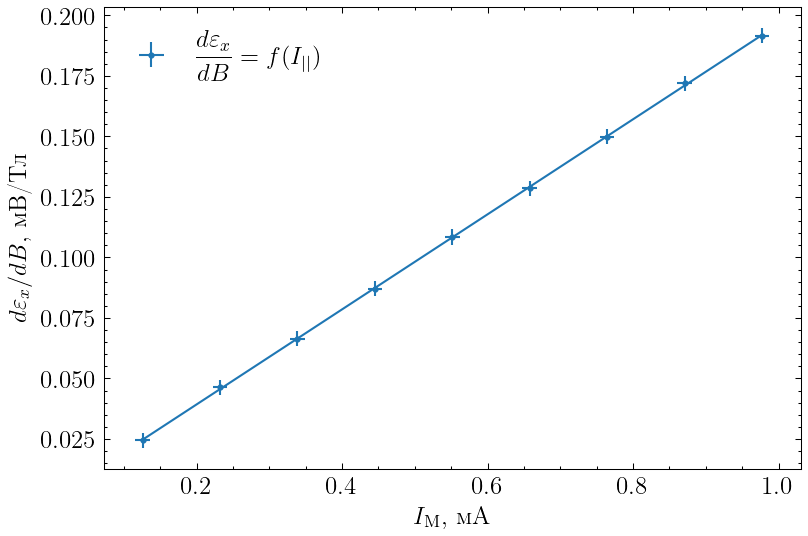

In [31]:
popt, pcov = curve_fit(line, I_values, dE_dB)

k = popt[0]

plt.errorbar(I_values, dE_dB, xerr=0.01, yerr=3.15e-03, color=colors[0], lw=1, ls='', marker='.', markersize=4, label=r"$\dfrac{d\varepsilon_x}{dB} = f(I_{||})$", ds='default')
plt.plot(I_values, line(I_values, popt[0], popt[1]), color=colors[0], lw=1)

plt.xlabel(r"$I_\text{М}$, мА")
plt.ylabel(r"$d\varepsilon_x/dB$, мВ/Тл")

plt.legend()
plt.savefig(rf"images/KonI.png")
plt.show()

In [32]:
h = 2.2e-3

In [33]:
R_h = k*h
R_h

0.0004318927697950297

In [34]:
q = 1.6e-19

In [35]:
n = 1 / (R_h * q)
n

1.44711846020626e+22

In [36]:
a = 2.2e-3
L35 = 3e-3
l = 2.5e-3

In [37]:
sigma = 1 * L35/(1.99 * a * l)
sigma

274.0977615349475

In [38]:
b = sigma * R_h
b*10000

1183.8084142394603